In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib

%matplotlib inline

In [ ]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [2]:
def random_vector(p):
    x = np.zeros(len(p))
    for i in range(len(p)):
        if (np.random.random() < p[i]):
            x[i] = 1
    return x

def random_population(p, N):
    P = []
    for i in range(N):
        P.append(random_vector(p))
    return P

def binary_random(p):
    if (np.random.random() < p):
        return 1
    else:
        return 0

def population_evaluation(P, F, EVAL):
    for i in range(len(P)):
        EVAL[i] = F(P[i])
        
def best_individual(P, EVAL):
    return P[EVAL.argmax()]

In [3]:
def pbil(F, I, N, LEN, p1, p2, p3):
    EVAL = np.zeros(N)
    bests = np.zeros(I)
    mids = np.zeros(I)
    lows = np.zeros(I)
    probs = []
    p = np.full(LEN, 0.5)
    P = random_population(p, N)
    population_evaluation(P, F, EVAL)
    for iteration in range(I):
        probs.append(p.copy())
        x = best_individual(P, EVAL)
        for i in range(LEN):
            p[i] = p[i]*(1-p1) + x[i]*p1
        for i in range(LEN):
            if (np.random.random() < p2):
                p[i] = p[i]*(1 - p3) + binary_random(0.5)*p3
        P = random_population(p, N)
        population_evaluation(P, F, EVAL)
        bests[iteration] = EVAL.max()
        mids[iteration] = EVAL.mean()
        lows[iteration] = EVAL.min()
    return {'best':bests, 'mid':mids, 'low':lows, 'probs':probs}

## OneMax

In [5]:
GENOME_LENGTH = 1000
ITERATIONS = 5000
POPULATION_SIZE = 200
def OneMax(ind):
    return ind.sum()

In [17]:
res = pbil(OneMax, ITERATIONS, POPULATION_SIZE, GENOME_LENGTH, 0.01, 0.05, 0.01)

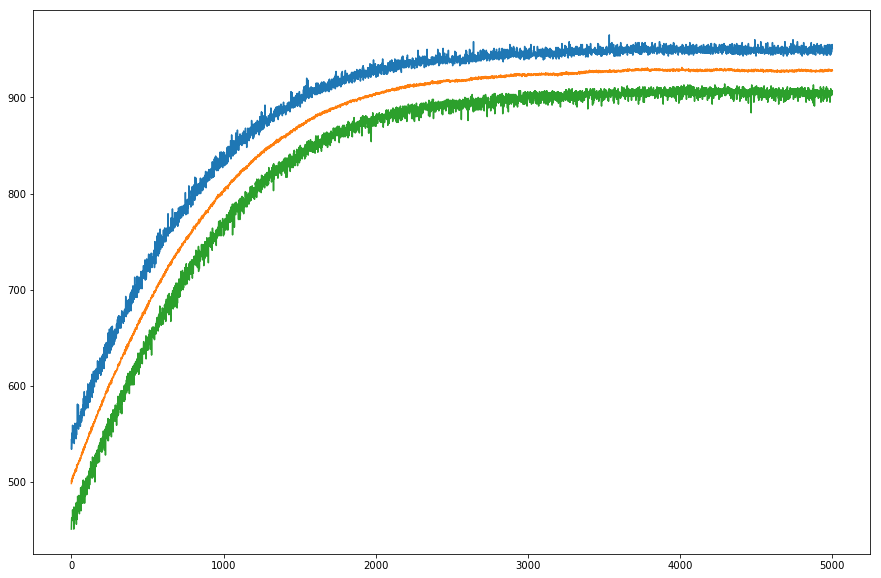

In [18]:
plt.figure(figsize=(15,10))
plt.plot(res['best'])
plt.plot(res['mid'])
plt.plot(res['low'])
plt.show()

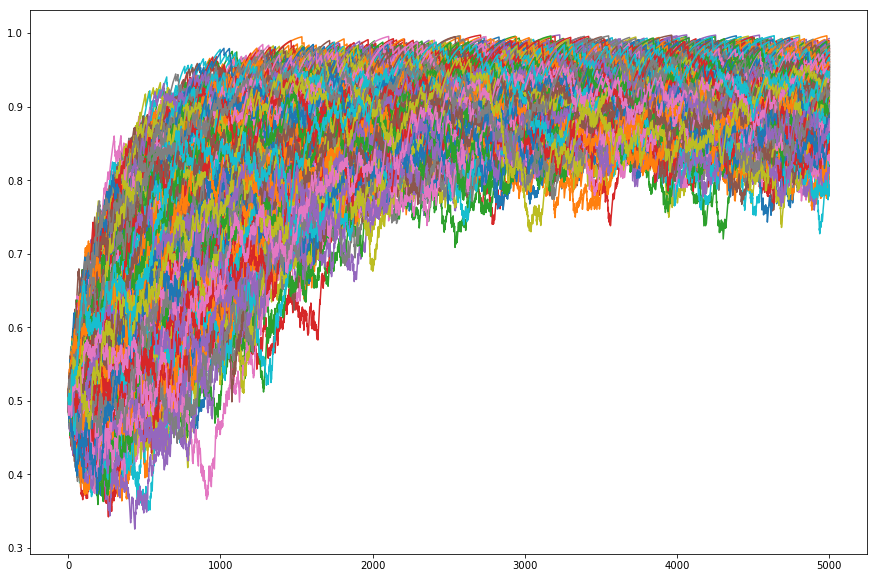

In [19]:
plt.figure(figsize=(15,10))
plt.plot(res['probs'])
plt.show()

## Deceptive OneMax

In [4]:
def deceptive_onemax(ind):
    if (OneMax(ind) == 0):
        return len(ind) + 1
    else:
        return OneMax(ind)

In [6]:
deceptive_res = pbil(deceptive_onemax, ITERATIONS, POPULATION_SIZE, GENOME_LENGTH, 0.01, 0.05, 0.01)

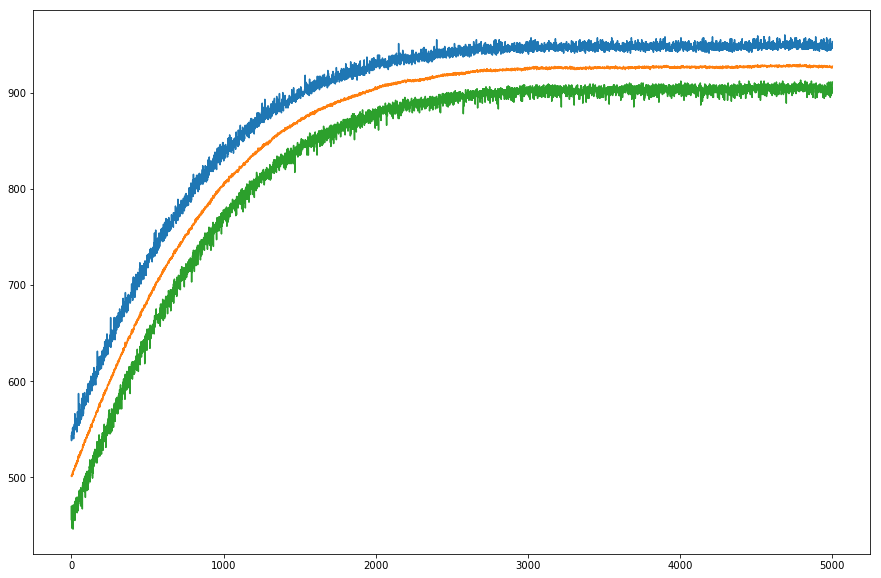

In [7]:
plt.figure(figsize=(15,10))
plt.plot(deceptive_res['best'])
plt.plot(deceptive_res['mid'])
plt.plot(deceptive_res['low'])
plt.show()

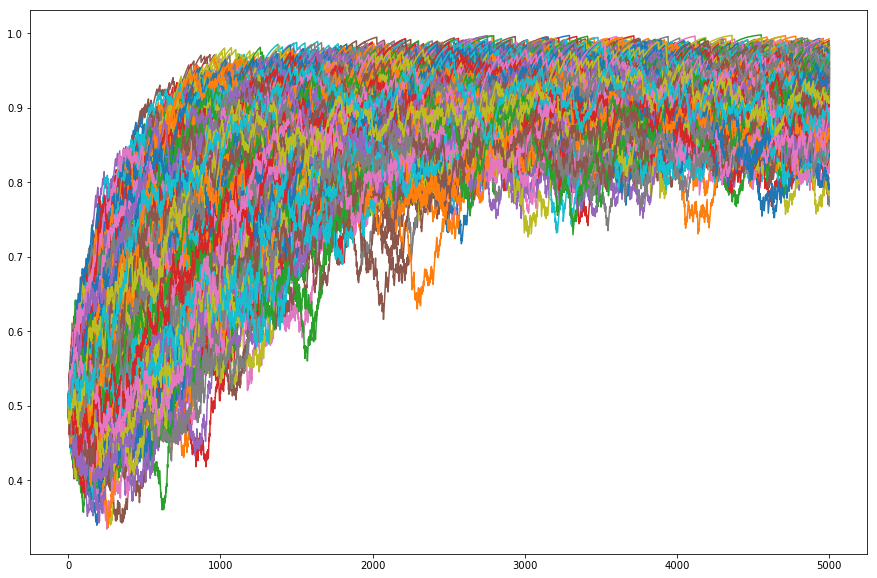

In [8]:
plt.figure(figsize=(15,10))
plt.plot(deceptive_res['probs'])
plt.show()

## 5-deceptive OneMax

In [12]:
def k_deceptive_onemax(ind):
    s = 0
    for i in np.split(ind, 200):
        s += deceptive_onemax(i)
    return s

In [13]:
k_deceptive_res = pbil(k_deceptive_onemax, ITERATIONS, POPULATION_SIZE, GENOME_LENGTH, 0.01, 0.05, 0.01)

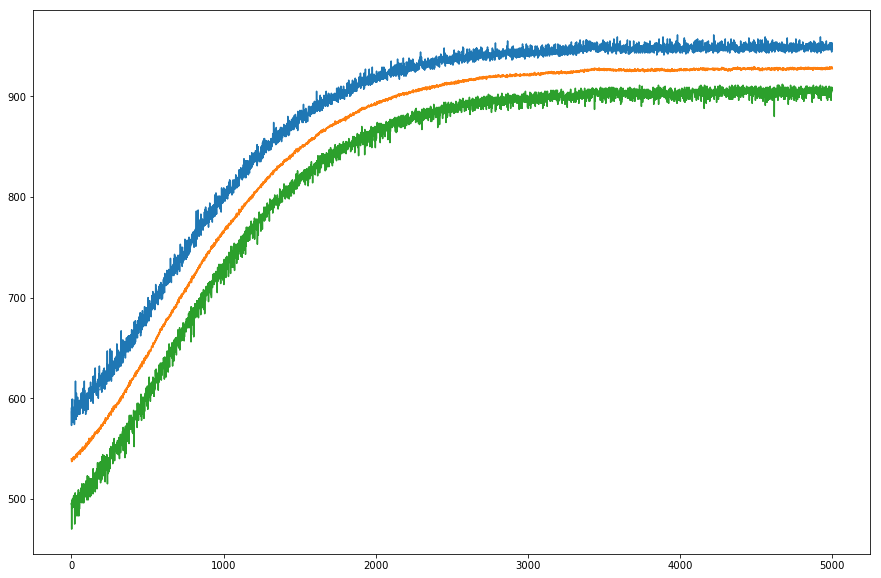

In [14]:
plt.figure(figsize=(15,10))
plt.plot(k_deceptive_res['best'])
plt.plot(k_deceptive_res['mid'])
plt.plot(k_deceptive_res['low'])
plt.show()

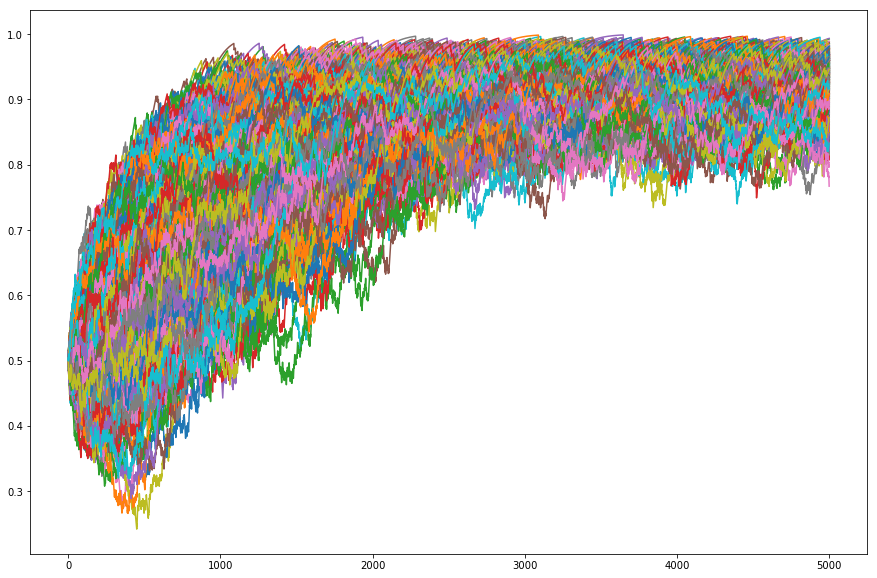

In [16]:
plt.figure(figsize=(15,10))
plt.plot(k_deceptive_res['probs'])
plt.show()